# GEQIE NCQI Example

## Setup

### Imports

In [1]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

import geqie
from geqie.encodings import ncqi

## Encoding

### Opening the image

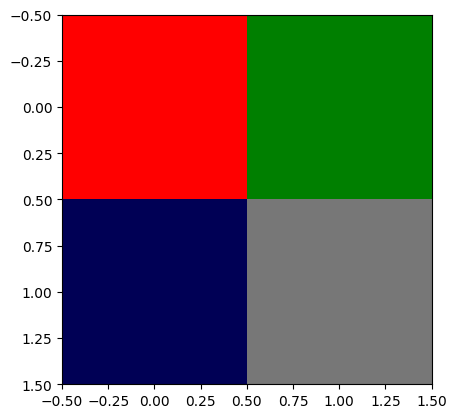

In [2]:
image = Image.open("../../assets/test_images/rgb/rgb.png")
image = np.asarray(image)
plt.imshow(image)

### Encoding using unitary gate

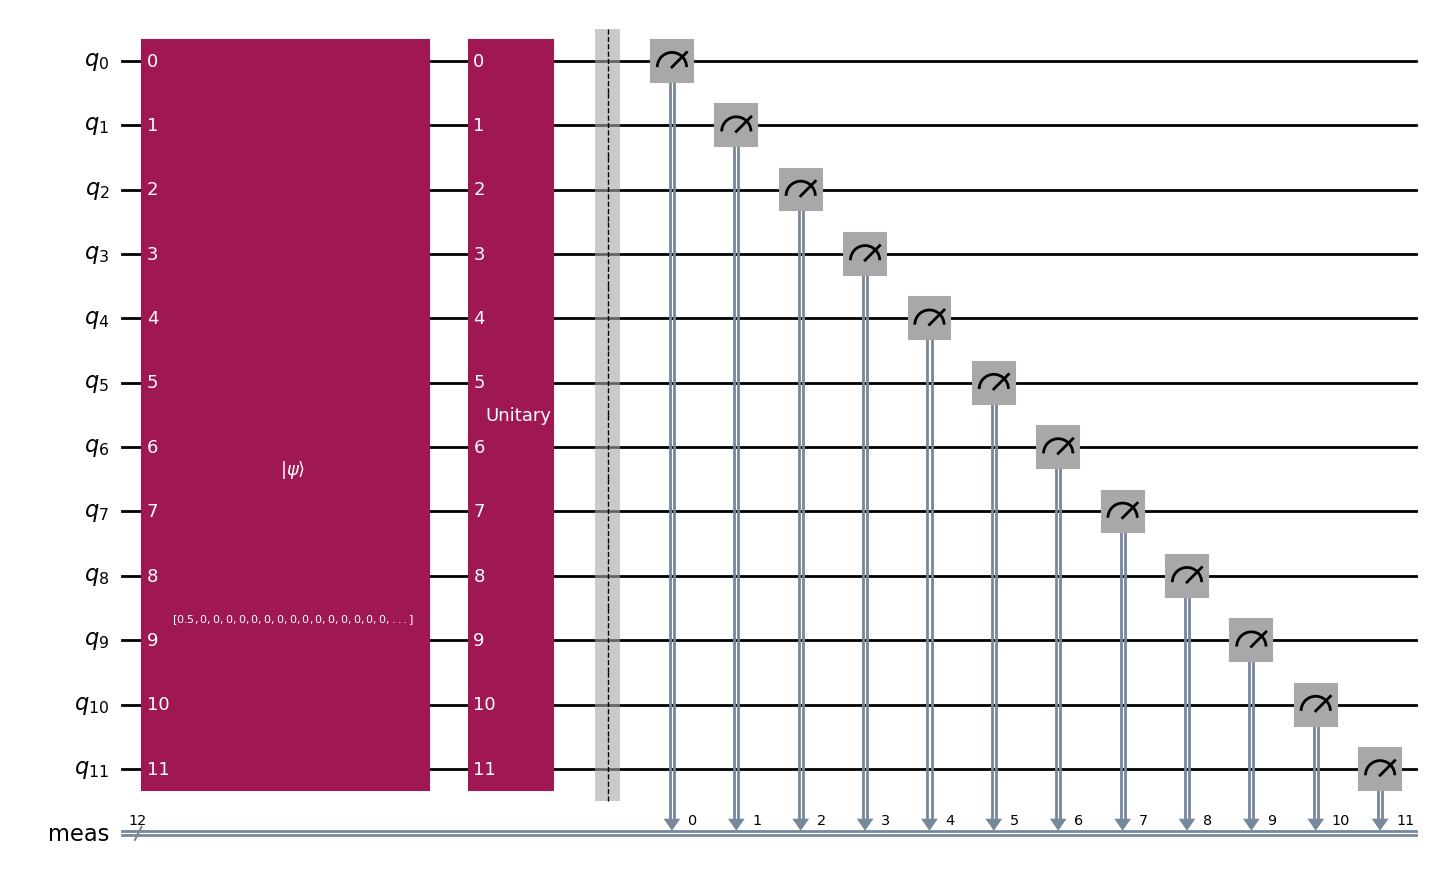

In [3]:
circuit = geqie.encode(ncqi.init_function, ncqi.data_function, ncqi.map_function, image)
circuit.draw(output='mpl')

### Simulating the circuit

In [4]:
result = geqie.simulate(circuit, 1000)

## Interpretation of the results

Total state $\ket{\psi}$ is equal to:
$$\ket{\psi} = \ket{X\_ coordinates}^{log_2(x)}\otimes\ket{Y\_ coordinates}^{log_2(y)}\otimes\ket{color}^{\otimes 8}\otimes\ket{RGB\_channel}^{\otimes 2}$$
Where:
- $\ket{X\_ coordinates}^{log_2(x)}$ and $\ket{Y\_ coordinates}^{log_2(y)}$ corresponds to X and Y positions encodings respectively,
- Next 8 qubits are used to encode color intensity for single channel, for example: $77 = \ket{01001101}$ (corresponds to $2^6+2^3+2^2+2^0$),
- Last 2 qubits are used to encode channel:
    - $\ket{position}\ket{color}\ket{00}$ - red channel;
    - $\ket{position}\ket{color}\ket{01}$ - green channel;
    - $\ket{position}\ket{color}\ket{10}$ - blue channel;


In [5]:
print(image)

[[[255   0   0]
  [  0 127   0]]

 [[  0   0  85]
  [119 119 119]]]


[[[255   0   0]
  [  0 127   0]]

 [[  0   0  85]
  [119 119 119]]]


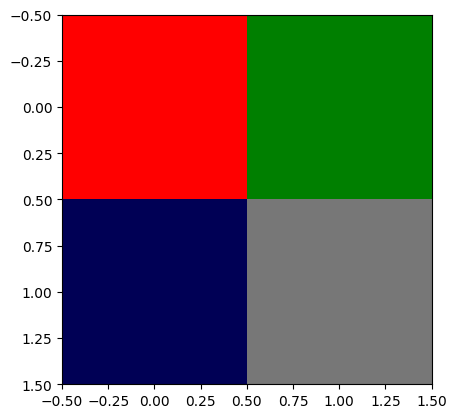

In [6]:
retrieved_image = ncqi.retrieve_function(result)
print(retrieved_image)
plt.imshow(retrieved_image, cmap="gray")
plt.show()

### Reconstructed image

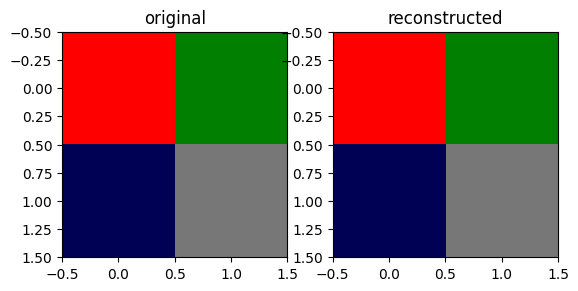

In [7]:
f = plt.figure()
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax.set_title("original")
ax.imshow(image)

ax = f.add_subplot(gs[0, 1])
ax.set_title("reconstructed")
ax.imshow(retrieved_image)